In [18]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

In [59]:
t = md.load('./hydrate_center.gro')
top = t.top
t

<mdtraj.Trajectory with 1 frames, 14235 atoms, 2515 residues, and unitcells at 0x7f0cd7577970>

In [72]:
def get_bonding(topology):

    top = open(topology, 'r')

    # Get to the atoms directive
    for line in top:
        if line.startswith('[ atoms ]'):
            break

    bonding = {}
    for line in top:
        if not line.startswith(';') and len(line.split()) > 0:
            atom = int(line.split()[0]) - 1
            bonding[atom] = {'bonded' : []}
        elif len(line.split()) == 0:
            break
    
    # Get to the bonding section
    for line in top:
        if line.startswith('[ bonds ]'):
            break

    for line in top:
        if not line.startswith(';') and len(line.split()) > 0:

            a1 = int(line.split()[0]) - 1
            a2 = int(line.split()[1]) - 1

            bonding[a1]['bonded'].append(a2)
            bonding[a2]['bonded'].append(a1)

        elif len(line.split()) == 0:
            break

    return bonding

In [74]:
top.atom(96)

PA1-H33

In [75]:
bonding[96]

{'bonded': [114]}

In [82]:
bonding = get_bonding('./PA_hydrated.top')

H_idx = []
for a1 in bonding:
    if top.atom(a1).element.symbol == 'H':
        a2 = bonding[a1]['bonded'][0]
        if top.atom(a2).element.symbol == 'O':
            H_idx.append(a1)

103

Max z: 8.332
Min z: 0.457


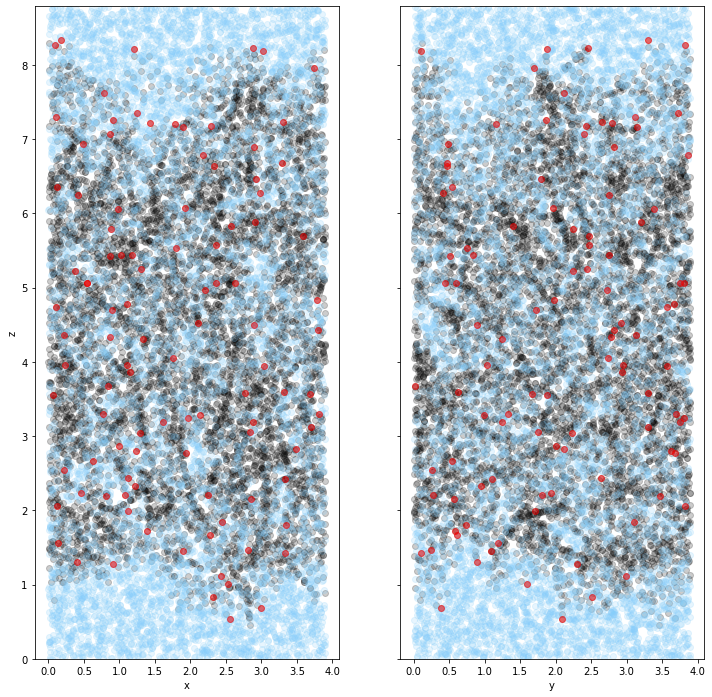

In [84]:
H_xyz = t.xyz[0,H_idx,:]
PA_xyz = t.xyz[0,top.select('resname PA'),:]
HOH_xyz = t.xyz[0,top.select('resname HOH'),:]

max_z = PA_xyz[:,2].max()
min_z = PA_xyz[:,2].min()

fig, ax = plt.subplots(1,2, figsize=(12,12), sharey=True)

ax[0].scatter(PA_xyz[:,0], PA_xyz[:,2], alpha=0.2, c='k')
ax[1].scatter(PA_xyz[:,1], PA_xyz[:,2], alpha=0.2, c='k')

ax[0].scatter(HOH_xyz[:,0], HOH_xyz[:,2], alpha=0.2, c='lightskyblue')
ax[1].scatter(HOH_xyz[:,1], HOH_xyz[:,2], alpha=0.2, c='lightskyblue')
     
ax[0].scatter(H_xyz[:,0], H_xyz[:,2], alpha=0.5, c='r')
ax[1].scatter(H_xyz[:,1], H_xyz[:,2], alpha=0.5, c='r')
    
ax[0].set_ylim((0,t.unitcell_lengths[0,2]))
ax[0].set_xlabel('x')
ax[0].set_ylabel('z')

ax[1].set_ylim((0,t.unitcell_lengths[0,2]))
ax[1].set_xlabel('y')

print('Max z:', max_z)
print('Min z:', min_z)